<a href="https://colab.research.google.com/github/MeenTers/KKU_data_mining/blob/master/Cafe_Sales_Sodas_and_Coffees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Function

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/SIST'
cafe = os.path.join(path,'cafedata.csv')

# Create DataFrame

In [4]:
cafe_df = pd.read_csv(cafe)
cafe_df.head()

,t,Date,Day Code,Day of Week,Bread Sand Sold,Bread Sand Waste,Wraps Sold,Wraps Waste,Muffins Sold,Muffins Waste,Cookies Sold,Cookies Waste,Fruit Cup Sold,Fruit Cup Waste,Chips,Juices,Sodas,Coffees,Total Soda and Coffee,Sales,Max Daily Temperature (F),Total Items Wasted,Unnamed: 22
0,1,1/19/2010,2,Tue,5,3,25,5,5,1,5,3,1,4,12,8,20,41,61,199.95,36,16,NaN
1,2,1/20/2010,3,Wed,6,8,7,17,3,5,1,6,0,3,0,0,13,33,46,195.74,34,39,NaN
2,3,1/21/2010,4,Thu,8,2,14,0,4,0,1,0,0,3,0,13,23,34,57,102.68,39,5,NaN
3,4,1/22/2010,5,Fri,4,2,5,7,5,0,3,1,3,0,20,0,13,27,40,162.88,40,10,NaN
4,5,1/25/2010,1,Mon,3,0,10,0,8,0,3,0,2,0,0,5,13,20,33,101.76,36,0,NaN


In [5]:
cafe_df = cafe_df.drop(columns=['Unnamed: 22'])
cafe_df = cafe_df.dropna()
cafe_df.head()

,t,Date,Day Code,Day of Week,Bread Sand Sold,Bread Sand Waste,Wraps Sold,Wraps Waste,Muffins Sold,Muffins Waste,Cookies Sold,Cookies Waste,Fruit Cup Sold,Fruit Cup Waste,Chips,Juices,Sodas,Coffees,Total Soda and Coffee,Sales,Max Daily Temperature (F),Total Items Wasted
0,1,1/19/2010,2,Tue,5,3,25,5,5,1,5,3,1,4,12,8,20,41,61,199.95,36,16
1,2,1/20/2010,3,Wed,6,8,7,17,3,5,1,6,0,3,0,0,13,33,46,195.74,34,39
2,3,1/21/2010,4,Thu,8,2,14,0,4,0,1,0,0,3,0,13,23,34,57,102.68,39,5
3,4,1/22/2010,5,Fri,4,2,5,7,5,0,3,1,3,0,20,0,13,27,40,162.88,40,10
4,5,1/25/2010,1,Mon,3,0,10,0,8,0,3,0,2,0,0,5,13,20,33,101.76,36,0


# K-mean

In [6]:
from sklearn.cluster import KMeans

In [7]:
def my_kmean(X):
    KMclust = KMeans(n_clusters=3,random_state=10)
    KMclust.fit(X)
    label = KMclust.predict(X)
    return label

In [8]:
preSodas = my_kmean(cafe_df[['Sodas']])
preSodas

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0,
       2, 2, 2], dtype=int32)

In [9]:
preCoffees = my_kmean(cafe_df[['Coffees']])
preCoffees

array([1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0], dtype=int32)

In [10]:
pretemp = my_kmean(cafe_df[['Max Daily Temperature (F)']])
pretemp

array([0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1], dtype=int32)

In [11]:
table_kmean = pd.DataFrame(pretemp,columns=['Group of Temperature'])
table_kmean['Group of Sodas'] = preSodas
table_kmean['Group of Coffees'] = preCoffees
table_kmean.head()

,Group of Temperature,Group of Sodas,Group of Coffees
0,0,1,1
1,2,1,1
2,0,1,1
3,0,1,2
4,0,1,2


In [12]:
table_total = cafe_df[['Max Daily Temperature (F)','Sodas','Coffees']]
table_total['Group of Temperature'] = pretemp
table_total['Group of Sodas'] = preSodas
table_total['Group of Coffees'] = preCoffees
table_total = table_total.astype(float)
table_total.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Max Daily Temperature (F),Sodas,Coffees,Group of Temperature,Group of Sodas,Group of Coffees
0,36.0,20.0,41.0,0.0,1.0,1.0
1,34.0,13.0,33.0,2.0,1.0,1.0
2,39.0,23.0,34.0,0.0,1.0,1.0
3,40.0,13.0,27.0,0.0,1.0,2.0
4,36.0,13.0,20.0,0.0,1.0,2.0


# Definition of Group K-mean

In [13]:
def mygroupby(x,y):
    values = table_total.groupby(x)[y].mean()
    return values

In [35]:
table_total[table_total['Group of Coffees']==2].describe()

,Max Daily Temperature (F),Sodas,Coffees,Group of Temperature,Group of Sodas,Group of Coffees
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.0
mean,35.944444,26.055556,22.500000,0.833333,0.777778,2.0
std,7.099894,11.185454,3.535534,0.985184,0.646762,0.0
min,26.000000,13.000000,16.000000,0.000000,0.000000,2.0
25%,31.500000,17.500000,20.250000,0.000000,0.000000,2.0
50%,35.500000,24.500000,23.000000,0.000000,1.000000,2.0
75%,39.000000,32.500000,25.000000,2.000000,1.000000,2.0
max,56.000000,54.000000,27.000000,2.000000,2.000000,2.0


In [14]:
mygroupby('Group of Temperature','Max Daily Temperature (F)')

Group of Temperature
0.0    39.833333
1.0    64.727273
2.0    29.777778
Name: Max Daily Temperature (F), dtype: float64

In [15]:
mygroupby('Group of Coffees','Coffees')

Group of Coffees
0.0     7.5
1.0    33.4
2.0    22.5
Name: Coffees, dtype: float64

In [16]:
mygroupby('Group of Sodas','Sodas')

Group of Sodas
0.0    32.105263
1.0    18.315789
2.0    48.000000
Name: Sodas, dtype: float64

# Split train and test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(table_kmean[['Group of Sodas','Group of Coffees']],table_kmean['Group of Temperature'],test_size=0.1, random_state=6)
X = table_kmean[['Group of Sodas','Group of Coffees']]

# RF

In [19]:
from sklearn.ensemble import RandomForestClassifier
skRF = RandomForestClassifier()
skRF.fit(X_train, y_train)
skRF.score(X_test,y_test)

0.6

# Prediction

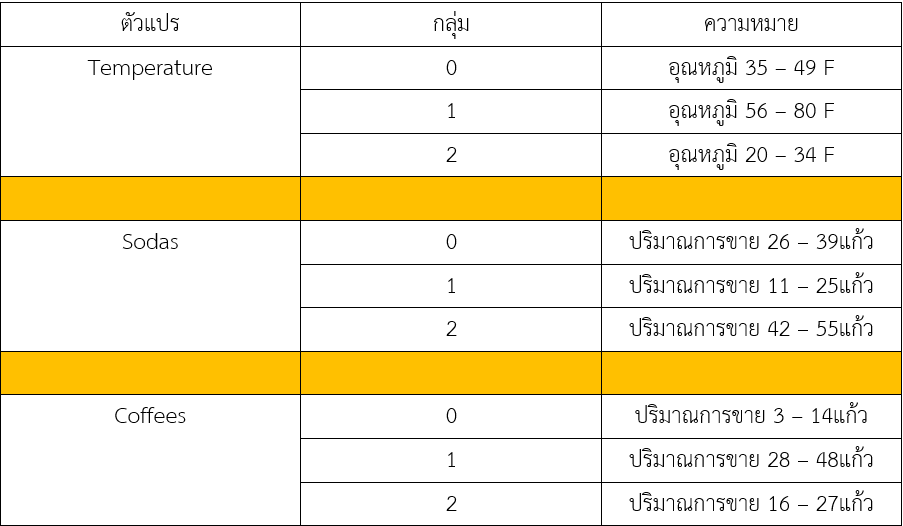

In [42]:
table_kmean['Predict Group of Temp'] = skRF.predict(X)
table_kmean.head(10)

,Group of Temperature,Group of Sodas,Group of Coffees,Predict Group of Temp
0,0,1,1,2
1,2,1,1,2
2,0,1,1,2
3,0,1,2,0
4,0,1,2,0
5,2,0,2,2
6,2,1,1,2
7,2,0,1,2
8,2,1,1,2
9,0,1,2,0
